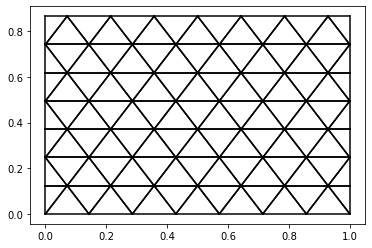

[0. 0.]
[0.142857 0.      ]
[0.285714 0.      ]
[0.428571 0.      ]
[0.571429 0.      ]
[0.714286 0.      ]
[0.857143 0.      ]
[1. 0.]
[0.       0.123718]
[1.       0.123718]
[0.       0.247436]
[1.       0.247436]
[0.       0.371154]
[1.       0.371154]
[0.       0.494872]
[1.       0.494872]
[0.      0.61859]
[1.      0.61859]
[0.       0.742307]
[1.       0.742307]
[0.       0.866025]
[0.0714286 0.866025 ]
[0.214286 0.866025]
[0.357143 0.866025]
[0.5      0.866025]
[0.642857 0.866025]
[0.785714 0.866025]
[0.928571 0.866025]
[1.       0.866025]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

V = np.genfromtxt("Meshdata/TriVertices.txt")
T = np.genfromtxt("Meshdata/Faces.txt")

n_v = int(V.size/2)
n_t = int(T.size/3)

for i in range(0, n_t , 1):
        for j in range( 0, 3 , 1):
                k = int(T[i][j])
                l = int(T[i][(j+1)%3])
                plt.plot( [V[k][0],V[l][0]], [V[k][1],V[l][1]] , c='black')
plt.show()



Sol = np.genfromtxt("Solutions/ErrorFor1.000000")

for i in range(0,len(Sol)):
    if (abs(Sol[i])>0.9):
        print(V[i])

In [2]:
Sol2 = np.genfromtxt("Solutions/ErrorFor2.000000")

for i in range(0,len(Sol2)):
    if (abs(Sol2[i])>0.9):
        print(V[i])

[0.142857 0.      ]
[0.285714 0.      ]
[0.428571 0.      ]
[0.571429 0.      ]
[0.714286 0.      ]
[0.857143 0.      ]
[1. 0.]
[0.       0.123718]
[1.       0.123718]
[0.       0.247436]
[1.       0.247436]
[0.       0.371154]
[1.       0.371154]
[0.       0.494872]
[1.       0.494872]
[0.      0.61859]
[1.      0.61859]
[0.       0.742307]
[1.       0.742307]
[0.       0.866025]
[0.0714286 0.866025 ]
[0.214286 0.866025]
[0.357143 0.866025]
[0.5      0.866025]
[0.642857 0.866025]
[0.785714 0.866025]
[0.928571 0.866025]
[1.       0.866025]


In [3]:
Sol3 = np.genfromtxt("Solutions/ErrorFor3.000000")

for i in range(0,len(Sol3)):
    if (abs(Sol3[i])>0.9):
        print(V[i])

[0. 0.]
[0.142857 0.      ]
[0.285714 0.      ]
[0.428571 0.      ]
[0.571429 0.      ]
[0.714286 0.      ]
[0.857143 0.      ]
[1. 0.]
[0.       0.123718]
[1.       0.123718]
[0.       0.247436]
[1.       0.247436]
[0.       0.371154]
[1.       0.371154]
[0.       0.494872]
[1.       0.494872]
[0.      0.61859]
[1.      0.61859]
[0.       0.742307]
[1.       0.742307]
[0.       0.866025]
[0.0714286 0.866025 ]
[0.214286 0.866025]
[0.357143 0.866025]
[0.5      0.866025]
[0.642857 0.866025]
[0.785714 0.866025]
[0.928571 0.866025]
[1.       0.866025]


In [4]:
Sol

array([ 1.20398e+01,  4.04145e+00,  4.04145e+00,  4.04145e+00,
        4.04145e+00,  4.04145e+00,  4.04145e+00,  1.20507e+01,
        1.39900e+01, -5.26318e-03, -2.80001e-08, -4.66668e-08,
        1.11022e-15,  4.66668e-08,  4.66668e-08,  5.26317e-03,
        1.40099e+01,  7.62182e+00,  2.80000e-08,  4.66668e-08,
        1.62537e-13, -1.64757e-13, -4.66668e-08, -4.66668e-08,
        7.65091e+00,  1.39900e+01, -5.26318e-03, -2.80001e-08,
       -4.66668e-08,  6.66134e-16,  4.66668e-08,  4.66668e-08,
        5.26317e-03,  1.40099e+01,  7.62182e+00,  2.80000e-08,
        4.66668e-08,  1.65423e-13, -1.64313e-13, -4.66668e-08,
       -4.66668e-08,  7.65091e+00,  1.39900e+01,          nan,
       -2.80000e-08, -4.66666e-08,  1.50990e-14,  4.66666e-08,
        4.66666e-08,  5.26316e-03,  1.40099e+01,  7.62183e+00,
        2.79998e-08,  4.66666e-08,  1.31450e-13, -1.80300e-13,
       -4.66666e-08, -4.66667e-08,  7.65092e+00,  2.39585e+01,
        9.42915e+00,  9.95854e+00,  9.95853e+00,  9.958

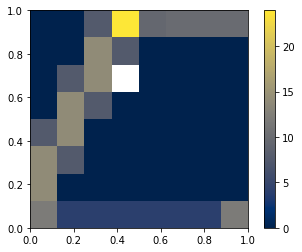

In [5]:

data = []
i = 0
while( V[i][1] == 0 ):
    i += 1
for j in range(0,i,1):
    arr = []
    for k in range(0,i,1):
        arr.append(Sol[k+i*j])
    data.append(arr)
bar = np.linspace(0,1,21)
X, Y = np.meshgrid(bar, bar)
#plt.contour( data)
plt.imshow( data, cmap='cividis',origin='lower', extent=(0,1,0,1))
plt.colorbar()
plt.show()

In [6]:
print(Sol)
print(Sol2)
print(Sol3)

[ 1.20398e+01  4.04145e+00  4.04145e+00  4.04145e+00  4.04145e+00
  4.04145e+00  4.04145e+00  1.20507e+01  1.39900e+01 -5.26318e-03
 -2.80001e-08 -4.66668e-08  1.11022e-15  4.66668e-08  4.66668e-08
  5.26317e-03  1.40099e+01  7.62182e+00  2.80000e-08  4.66668e-08
  1.62537e-13 -1.64757e-13 -4.66668e-08 -4.66668e-08  7.65091e+00
  1.39900e+01 -5.26318e-03 -2.80001e-08 -4.66668e-08  6.66134e-16
  4.66668e-08  4.66668e-08  5.26317e-03  1.40099e+01  7.62182e+00
  2.80000e-08  4.66668e-08  1.65423e-13 -1.64313e-13 -4.66668e-08
 -4.66668e-08  7.65091e+00  1.39900e+01          nan -2.80000e-08
 -4.66666e-08  1.50990e-14  4.66666e-08  4.66666e-08  5.26316e-03
  1.40099e+01  7.62183e+00  2.79998e-08  4.66666e-08  1.31450e-13
 -1.80300e-13 -4.66666e-08 -4.66667e-08  7.65092e+00  2.39585e+01
  9.42915e+00  9.95854e+00  9.95853e+00  9.95851e+00  9.95853e+00
  9.95853e+00  9.43967e+00  2.39585e+01]
[ 3.15470e-01  4.04216e+00  4.04216e+00  4.04217e+00  4.04217e+00
  4.04216e+00  4.04216e+00  8.31132